In [1]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"
c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\envs\registration.py:594: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two.

In [2]:
#Hyperparameters
episodes = 20000*5
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
update_target = 100
max_steps = 200

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [4]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
target = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)

opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [5]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [6]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    next_q_values = target(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


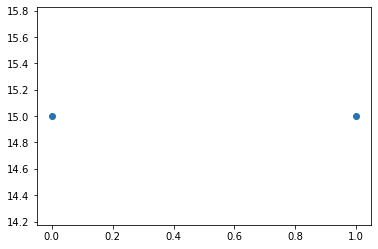

Episode =  1  Epsilon =  0.9985011993203061
Episode =  2  Epsilon =  0.9928262152973618
Episode =  3  Epsilon =  0.991040824711427
Episode =  4  Epsilon =  0.989258644777563
Episode =  5  Epsilon =  0.9883687570004747
Episode =  6  Epsilon =  0.9871834850600734
Episode =  7  Epsilon =  0.9847187318082584
Episode =  8  Epsilon =  0.9830462156301286
Episode =  9  Epsilon =  0.9791220804733274
Episode =  10  Epsilon =  0.9774590700450109
Episode =  11  Epsilon =  0.9756037536848524
Episode =  12  Epsilon =  0.9746286862986691
Episode =  13  Epsilon =  0.972584215724675
Episode =  14  Epsilon =  0.9714178729276057
Episode =  15  Epsilon =  0.9701559132412461
Episode =  16  Epsilon =  0.967927230041203
Episode =  17  Epsilon =  0.9662832337413423
Episode =  18  Epsilon =  0.9642562693544944
Episode =  19  Epsilon =  0.9628110414025867
Episode =  20  Epsilon =  0.9604071401207129
Episode =  21  Epsilon =  0.9569560626337302
Episode =  22  Epsilon =  0.9555217762366174
Episode =  23  Epsilon 

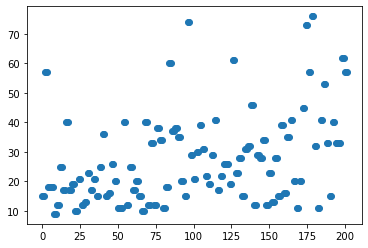

Episode =  101  Epsilon =  0.7558699012290203
Episode =  102  Epsilon =  0.7545860781458079
Episode =  103  Epsilon =  0.7531537973078316
Episode =  104  Epsilon =  0.7484989215297092
Episode =  105  Epsilon =  0.7452874463579322
Episode =  106  Epsilon =  0.7358826131162337
Episode =  107  Epsilon =  0.7347796717555202
Episode =  108  Epsilon =  0.7336050229817696
Episode =  109  Epsilon =  0.7309689245258255
Episode =  110  Epsilon =  0.7287794131351305
Episode =  111  Epsilon =  0.7239855458606694
Episode =  112  Epsilon =  0.7226836090684933
Episode =  113  Epsilon =  0.717212304491506
Episode =  114  Epsilon =  0.7114266376857252
Episode =  115  Epsilon =  0.7063936484568617
Episode =  116  Epsilon =  0.7023086275551644
Episode =  117  Epsilon =  0.6969218860241079
Episode =  118  Epsilon =  0.692476050090983
Episode =  119  Epsilon =  0.6917839547504244
Episode =  120  Epsilon =  0.684216407431617
Episode =  121  Epsilon =  0.6823033766336554
Episode =  122  Epsilon =  0.67767968

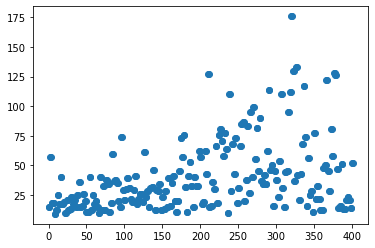

Episode =  201  Epsilon =  0.44305591510054426
Episode =  202  Epsilon =  0.44230339749131686
Episode =  203  Epsilon =  0.44141971885271325
Episode =  204  Epsilon =  0.4408462747093833
Episode =  205  Epsilon =  0.44014151986122224
Episode =  206  Epsilon =  0.43943789166292646
Episode =  207  Epsilon =  0.438910908794591
Episode =  208  Epsilon =  0.43820924790137444
Episode =  209  Epsilon =  0.4377275068215025
Episode =  210  Epsilon =  0.43676561287168053
Episode =  211  Epsilon =  0.4358929981814918
Episode =  212  Epsilon =  0.4351091356651348
Episode =  213  Epsilon =  0.43367571363446294
Episode =  214  Epsilon =  0.43280927225871596
Episode =  215  Epsilon =  0.43198775640372195
Episode =  216  Epsilon =  0.4282459504662482
Episode =  217  Epsilon =  0.42547151718356074
Episode =  218  Epsilon =  0.4228418855376763
Episode =  219  Epsilon =  0.4223348049378452
Episode =  220  Epsilon =  0.42077513131739275
Episode =  221  Epsilon =  0.41855103338994143
Episode =  222  Epsilo

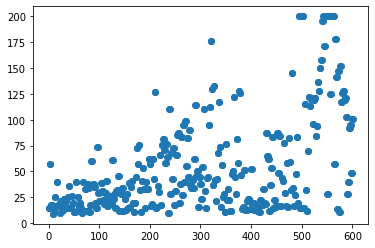

Episode =  301  Epsilon =  0.19586718334724645
Episode =  302  Epsilon =  0.19382143915889463
Episode =  303  Epsilon =  0.19185460671646887
Episode =  304  Epsilon =  0.19000270586365223
Episode =  305  Epsilon =  0.18801821349158096
Episode =  306  Epsilon =  0.18773641166540495
Episode =  307  Epsilon =  0.1855899162577619
Episode =  308  Epsilon =  0.18295499677220245
Episode =  309  Epsilon =  0.18046572819966633
Episode =  310  Epsilon =  0.17804593222826257
Episode =  311  Epsilon =  0.17588707559717354
Episode =  312  Epsilon =  0.17398041199794875
Episode =  313  Epsilon =  0.17185366556801504
Episode =  314  Epsilon =  0.1696341370820732
Episode =  315  Epsilon =  0.16777847918420144
Episode =  316  Epsilon =  0.165744118287506
Episode =  317  Epsilon =  0.16376717310685085
Episode =  318  Epsilon =  0.16142594020504175
Episode =  319  Epsilon =  0.16110342707065306
Episode =  320  Epsilon =  0.16086196514465853
Episode =  321  Epsilon =  0.1576768424865648
Episode =  322  Ep

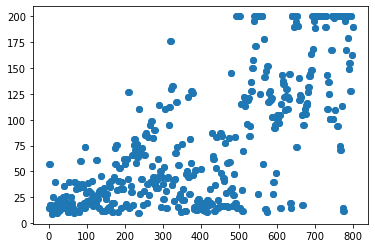

Episode =  401  Epsilon =  0.04508773388852259
Episode =  402  Epsilon =  0.044434267557854804
Episode =  403  Epsilon =  0.04386038906494836
Episode =  404  Epsilon =  0.04341096801969113
Episode =  405  Epsilon =  0.0427689714467934
Episode =  406  Epsilon =  0.042111196204209576
Episode =  407  Epsilon =  0.04145524590366811
Episode =  408  Epsilon =  0.0409157505659347
Episode =  409  Epsilon =  0.0401939295606838
Episode =  410  Epsilon =  0.03953225054275132
Episode =  411  Epsilon =  0.03884648836510304
Episode =  412  Epsilon =  0.03814209767844262
Episode =  413  Epsilon =  0.0373868709259062
Episode =  414  Epsilon =  0.03726370374771962
Episode =  415  Epsilon =  0.03716694879158827
Episode =  416  Epsilon =  0.03643103032495858
Episode =  417  Epsilon =  0.0357096832990076
Episode =  418  Epsilon =  0.03500261919416006
Episode =  419  Epsilon =  0.03430955520362826
Episode =  420  Epsilon =  0.03363021412029681
Episode =  421  Epsilon =  0.03296432422584748
Episode =  422  

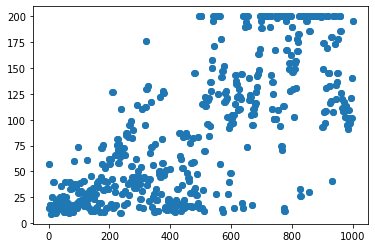

Episode =  501  Epsilon =  0.009387590837002028
Episode =  502  Epsilon =  0.009275618522962029
Episode =  503  Epsilon =  0.009166814868463708
Episode =  504  Epsilon =  0.009030345547359637
Episode =  505  Epsilon =  0.00889768715946586
Episode =  506  Epsilon =  0.008728489520538459
Episode =  507  Epsilon =  0.008555662403091522
Episode =  508  Epsilon =  0.008386257322464901
Episode =  509  Epsilon =  0.00822020652114362
Episode =  510  Epsilon =  0.008074381146112511
Episode =  511  Epsilon =  0.007914505601166634
Episode =  512  Epsilon =  0.007757795647417057
Episode =  513  Epsilon =  0.007604188605061037
Episode =  514  Epsilon =  0.007483495739488779
Episode =  515  Epsilon =  0.007394234889755503
Episode =  516  Epsilon =  0.007315542267285123
Episode =  517  Epsilon =  0.007242755026645853
Episode =  518  Epsilon =  0.007144925200316005
Episode =  519  Epsilon =  0.007073128230581162
Episode =  520  Epsilon =  0.006998552748343718
Episode =  521  Epsilon =  0.0069282266265

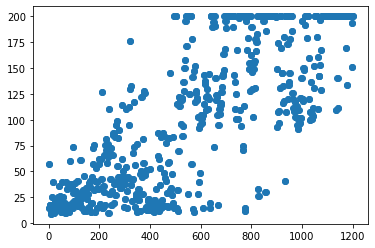

Episode =  601  Epsilon =  0.0015638931204004236
Episode =  602  Epsilon =  0.0015329274946346012
Episode =  603  Epsilon =  0.0015025749989903716
Episode =  604  Epsilon =  0.0014728234932788419
Episode =  605  Epsilon =  0.0014436610776910651
Episode =  606  Epsilon =  0.0014150760880384352
Episode =  607  Epsilon =  0.0013870570910873234
Episode =  608  Epsilon =  0.0013595928799860916
Episode =  609  Epsilon =  0.0013326724697826462
Episode =  610  Epsilon =  0.0013062850930307508
Episode =  611  Epsilon =  0.0012804201954833348


KeyboardInterrupt: 

In [7]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

    done = False
    steps = 0
    eps_rew = 0 
    eps_loss = 0
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
#             action = env.action_space.sample()
            action = np.argmax(model(state).detach().numpy())
                

        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size and steps%4==0:
            loss = compute_td_loss(batch_size)
            eps_loss += loss.detach().numpy()
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        
        if steps%50==0:
            target.load_state_dict(model.state_dict())
        
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        steps += 1
    tot_rewards.append(eps_rew)
    tot_loss.append(eps_loss)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
        plt.show()

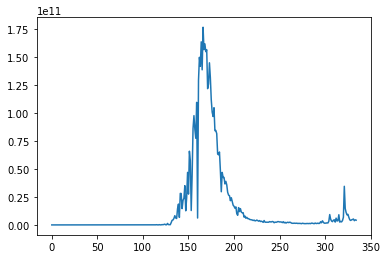

In [149]:
plt.plot(tot_loss)

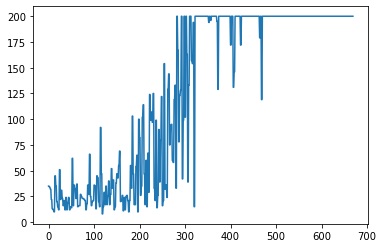

In [150]:
#Plot
plt.plot(tot_rewards)

In [152]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()
